Loaded 8986 analyzed reviews.

--- Generating Visualizations ---


C:\Users\eep\AppData\Local\Temp\ipykernel_11156\1573244872.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_analyzed, x='Rating', palette='viridis')


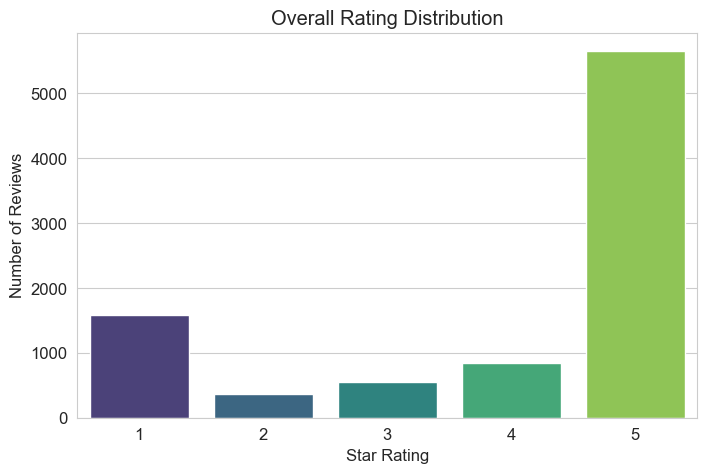

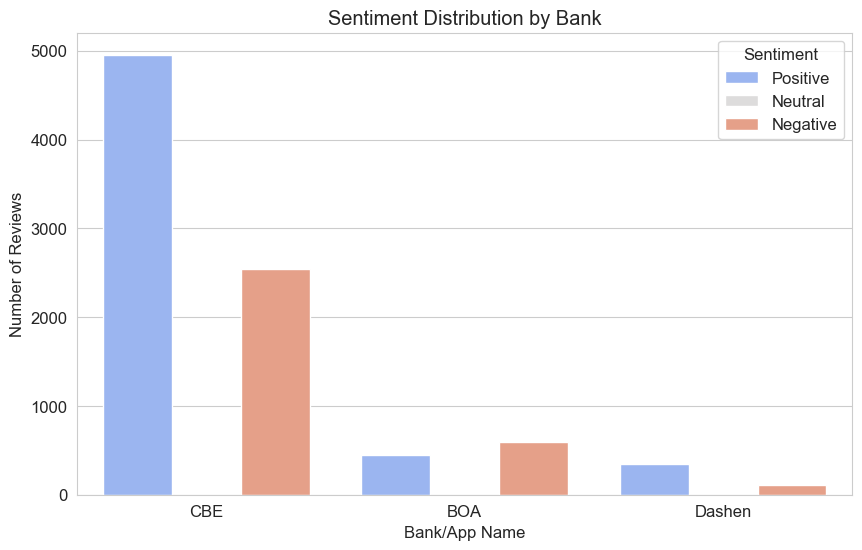

C:\Users\eep\AppData\Local\Temp\ipykernel_11156\1573244872.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_analyzed, x='Rating', y='Sentiment_Score', palette='plasma')


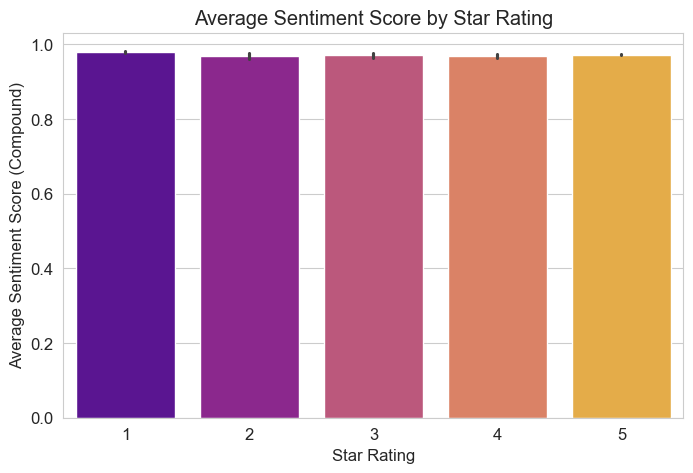

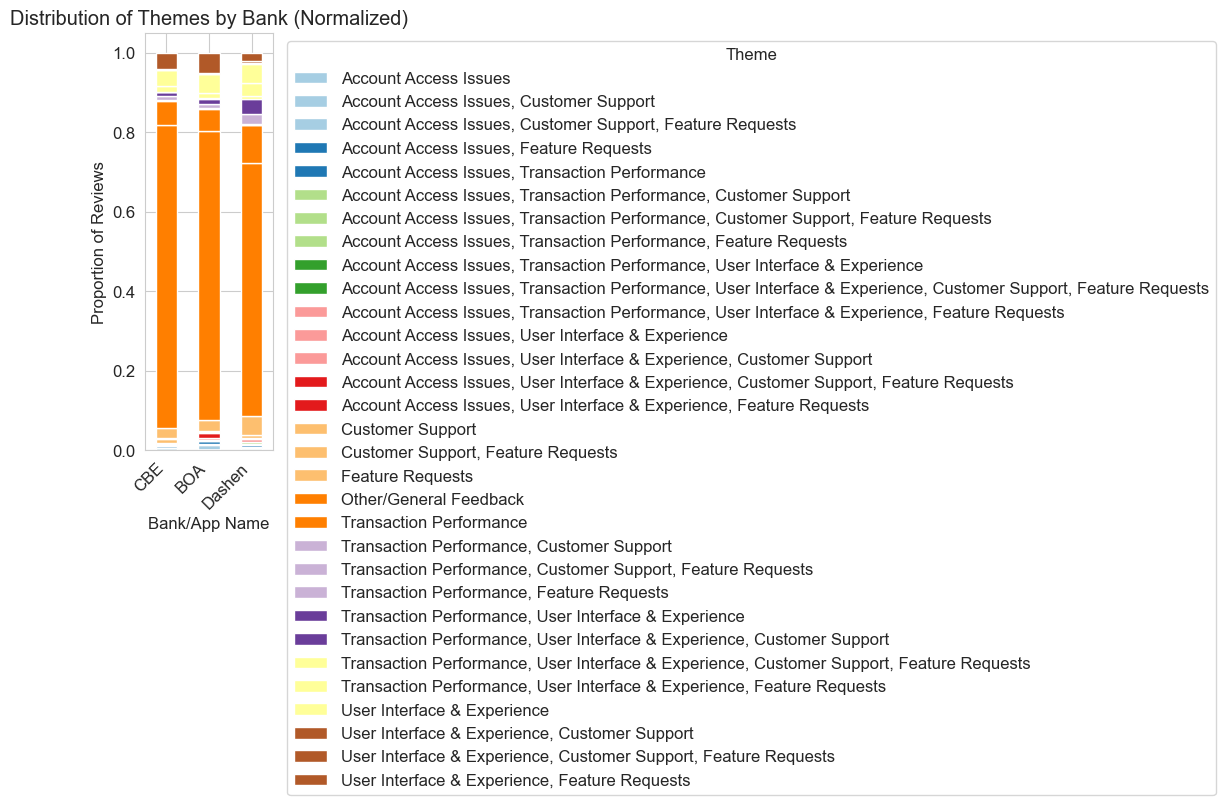

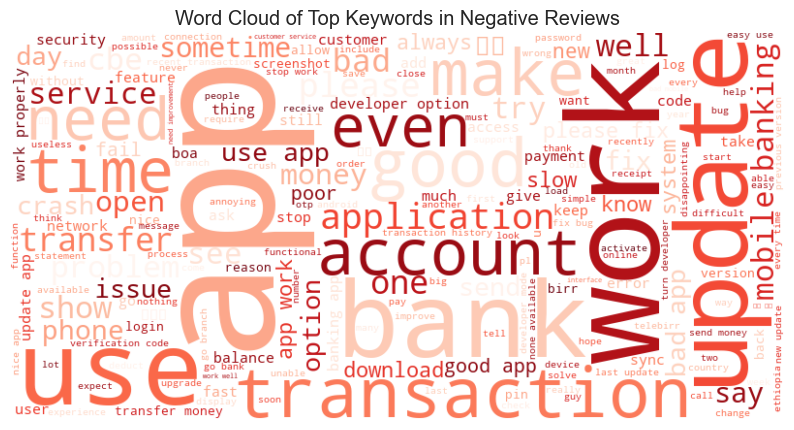


All visualizations saved to d:\10academy\10acadamey\week_02_challenge\notebooks\..\output\visualizations

--- Report Outline ---
Based on the analysis and visualizations, structure your 4-page final report as follows:

1.  **Executive Summary (Page 1)**
    * Brief overview of findings (e.g., BOA's low sentiment, common pain points).
    * Top 3 actionable recommendations for the banks.

2.  **Introduction & Methodology (Page 1-2)**
    * Project objectives and business context (Omega Consultancy's role).
    * Briefly explain data collection (scraping Google Play), preprocessing, sentiment analysis (VADER/Hugging Face), and thematic analysis (TF-IDF, rule-based).
    * Mention database storage in Oracle.

3.  **Key Findings & Scenario Analysis (Page 2-3)**
    * **Overall App Performance:** Discuss overall sentiment and rating distribution across banks (use relevant plots).
    * **Scenario 1: Retaining Users (Slow Loading/Transfers):**
        * Present findings on slow loading/tran

In [ ]:
# notebooks/05_reporting_visualizations.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ast # For literal_eval
from collections import Counter
from wordcloud import WordCloud # For keyword clouds

# Configure plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Define output paths for visualizations
output_viz_dir = os.path.join(os.path.abspath(''), os.pardir, 'output', 'visualizations')
os.makedirs(output_viz_dir, exist_ok=True)

# Load the analyzed data
processed_data_dir = os.path.join(os.path.abspath(''), os.pardir, 'data', 'processed')
input_filepath = os.path.join(processed_data_dir, 'fintech_app_reviews_analyzed.csv')

if not os.path.exists(input_filepath):
    print(f"Error: Analyzed data file not found at {input_filepath}. Please run 02_sentiment_thematic_analysis.ipynb first.")
    df_analyzed = pd.DataFrame() # Create an empty DataFrame to avoid errors
else:
    df_analyzed = pd.read_csv(input_filepath)
    print(f"Loaded {len(df_analyzed)} analyzed reviews.")
    
    # Ensure 'Processed_Reviews_Tokens' and 'Extracted_Keywords' are parsed as lists
    df_analyzed['Processed_Reviews_Tokens'] = df_analyzed['Processed_Reviews_Tokens'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
    df_analyzed['Extracted_Keywords'] = df_analyzed['Extracted_Keywords'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])


if not df_analyzed.empty:
    print("\n--- Generating Visualizations ---")

    # 1. Overall Rating Distribution
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_analyzed, x='Rating', palette='viridis')
    plt.title('Overall Rating Distribution')
    plt.xlabel('Star Rating')
    plt.ylabel('Number of Reviews')
    plt.savefig(os.path.join(output_viz_dir, 'overall_rating_distribution.png'))
    plt.show()

    # 2. Sentiment Distribution by Bank
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_analyzed, x='Bank/App Name', hue='Sentiment', palette='coolwarm', 
                  order=df_analyzed['Bank/App Name'].value_counts().index,
                  hue_order=['Positive', 'Neutral', 'Negative'])
    plt.title('Sentiment Distribution by Bank')
    plt.xlabel('Bank/App Name')
    plt.ylabel('Number of Reviews')
    plt.legend(title='Sentiment')
    plt.savefig(os.path.join(output_viz_dir, 'sentiment_by_bank.png'))
    plt.show()

    # 3. Average Sentiment Score by Rating
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df_analyzed, x='Rating', y='Sentiment_Score', palette='plasma')
    plt.title('Average Sentiment Score by Star Rating')
    plt.xlabel('Star Rating')
    plt.ylabel('Average Sentiment Score (Compound)')
    plt.savefig(os.path.join(output_viz_dir, 'avg_sentiment_by_rating.png'))
    plt.show()

    # 4. Top Themes by Bank (stacked bar chart or heatmap)
    theme_bank_counts = df_analyzed.groupby('Bank/App Name')['Identified_Theme'].value_counts(normalize=True).unstack(fill_value=0)
    theme_bank_counts = theme_bank_counts.reindex(df_analyzed['Bank/App Name'].value_counts().index) # Order by total reviews
    
    plt.figure(figsize=(12, 7))
    theme_bank_counts.plot(kind='bar', stacked=True, colormap='Paired', ax=plt.gca())
    plt.title('Distribution of Themes by Bank (Normalized)')
    plt.xlabel('Bank/App Name')
    plt.ylabel('Proportion of Reviews')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(os.path.join(output_viz_dir, 'themes_by_bank_stacked.png'))
    plt.show()

    # 5. Word Cloud of Top Negative Keywords (Overall)
    negative_reviews_text = ' '.join(df_analyzed[df_analyzed['Sentiment'] == 'Negative']['Processed_Reviews_Tokens'].explode().dropna().tolist())
    
    if negative_reviews_text:
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_reviews_text)
        plt.figure(figsize=(10, 7))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Top Keywords in Negative Reviews')
        plt.savefig(os.path.join(output_viz_dir, 'negative_keywords_wordcloud.png'))
        plt.show()
    else:
        print("No negative reviews to generate word cloud.")

    # You can add more specific plots based on the scenarios, e.g.:
    # - Time series of average sentiment/rating (if enough data and time variations)
    # - Bar charts for specific pain points (e.g., 'slow loading' complaints per bank)

    print(f"\nAll visualizations saved to {output_viz_dir}")

    print("\n--- Report Outline ---")
    print("Based on the analysis and visualizations, structure your 4-page final report as follows:")
    print("\n1.  **Executive Summary (Page 1)**")
    print("    * Brief overview of findings (e.g., BOA's low sentiment, common pain points).")
    print("    * Top 3 actionable recommendations for the banks.")
    print("\n2.  **Introduction & Methodology (Page 1-2)**")
    print("    * Project objectives and business context (Omega Consultancy's role).")
    print("    * Briefly explain data collection (scraping Google Play), preprocessing, sentiment analysis (VADER/Hugging Face), and thematic analysis (TF-IDF, rule-based).")
    print("    * Mention database storage in Oracle.")
    print("\n3.  **Key Findings & Scenario Analysis (Page 2-3)**")
    print("    * **Overall App Performance:** Discuss overall sentiment and rating distribution across banks (use relevant plots).")
    print("    * **Scenario 1: Retaining Users (Slow Loading/Transfers):**")
    print("        * Present findings on slow loading/transfer complaints (e.g., sentiment breakdown, bank comparison).")
    print("        * Identify pain points and suggest areas for investigation.")
    print("    * **Scenario 2: Enhancing Features:**")
    print("        * Show common feature requests (e.g., top keywords from feature reviews).")
    print("        * Discuss how each bank can leverage these for competitiveness.")
    print("    * **Scenario 3: Managing Complaints:**")
    print("        * Present top complaint themes (from negative reviews) and specific keywords (e.g., 'login error').")
    print("        * Explain how these insights guide AI chatbot integration and support strategies.")
    print("\n4.  **Actionable Recommendations & Ethical Considerations (Page 4)**")
    print("    * Synthesize concrete, actionable recommendations for each bank (CBE, BOA, Dashen) based on drivers and pain points identified.")
    print("        * *Example for CBE:* Focus on advanced features like budgeting, minor UI tweaks to maintain high satisfaction.")
    print("        * *Example for BOA:* Address critical performance issues (loading times, crashes) and improve customer support responsiveness.")
    print("        * *Example for Dashen:* Enhance key features like fingerprint login, improve stability, and address common bugs.")
    print("    * **Ethical Considerations:** Briefly note potential biases in review data (e.g., users more likely to leave extreme reviews), the challenge of understanding nuances in short texts, and the importance of responsible data use.")
    print("\n5.  **Conclusion (Page 4)**")
    print("    * Summarize the value of data-driven customer experience analytics.")

else:
    print("No data available to generate visualizations or report outline.")